In [116]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt

In [117]:
df = pd.read_csv("/content/amazon.csv")
df

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [118]:
df.dtypes

year        int64
state      object
month      object
number    float64
date       object
dtype: object

In [119]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

In [120]:
df.head(5)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [121]:
df.tail(5)

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [122]:
row, col = df.shape
print(f"Number of rows: {row}")
print(f"Number of columns: {col}")

Number of rows: 6454
Number of columns: 5


In [123]:
memory_usage = df.memory_usage(deep=True).sum()
print("Memory usage of DataFrame:", memory_usage, "bytes")

Memory usage of DataFrame: 1010516 bytes


In [124]:
df.isnull().value_counts()

year   state  month  number  date 
False  False  False  False   False    6454
dtype: int64

In [125]:
df.describe(include = 'all')

<ipython-input-125-74aa2f970831>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include = 'all')


,year,state,month,number,date
count,6454.000000,6454,6454,6454.000000,6454
unique,NaN,23,12,NaN,20
top,NaN,Rio,Janeiro,NaN,1998-01-01 00:00:00
freq,NaN,717,541,NaN,324
first,NaN,NaN,NaN,NaN,1998-01-01 00:00:00
last,NaN,NaN,NaN,NaN,2017-01-01 00:00:00
mean,2007.461729,NaN,NaN,108.293163,NaN
std,5.746654,NaN,NaN,190.812242,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2002.000000,NaN,NaN,3.000000,NaN


In [126]:
df['month'].value_counts()

Janeiro      541
Fevereiro    540
Mar�o        540
Abril        540
Maio         540
Junho        540
Julho        540
Agosto       540
Setembro     540
Outubro      540
Novembro     540
Dezembro     513
Name: month, dtype: int64

In [127]:
#Cleaning data
df['month'] = df['month'].str.replace('Mar�o', 'Marco')
df['month'].value_counts()

Janeiro      541
Fevereiro    540
Marco        540
Abril        540
Maio         540
Junho        540
Julho        540
Agosto       540
Setembro     540
Outubro      540
Novembro     540
Dezembro     513
Name: month, dtype: int64

In [128]:
df.replace(to_replace={
    'Janeiro': 'January',
    'Fevereiro': 'February',
    'Marco': 'March',
    'Abril': 'April',
    'Maio': 'May',
    'Junho': 'June',
    'Julho': 'July',
    'Agosto': 'August',
    'Setembro': 'September',
    'Outubro': 'October',
    'Novembro': 'November',
    'Dezembro': 'December'
}, inplace=True)
df


,year,state,month,number,date
0,1998,Acre,January,0.0,1998-01-01
1,1999,Acre,January,0.0,1999-01-01
2,2000,Acre,January,0.0,2000-01-01
3,2001,Acre,January,0.0,2001-01-01
4,2002,Acre,January,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,December,128.0,2012-01-01
6450,2013,Tocantins,December,85.0,2013-01-01
6451,2014,Tocantins,December,223.0,2014-01-01
6452,2015,Tocantins,December,373.0,2015-01-01


In [129]:
#Total number of fires registered
print(df['number'].sum())

698924.073


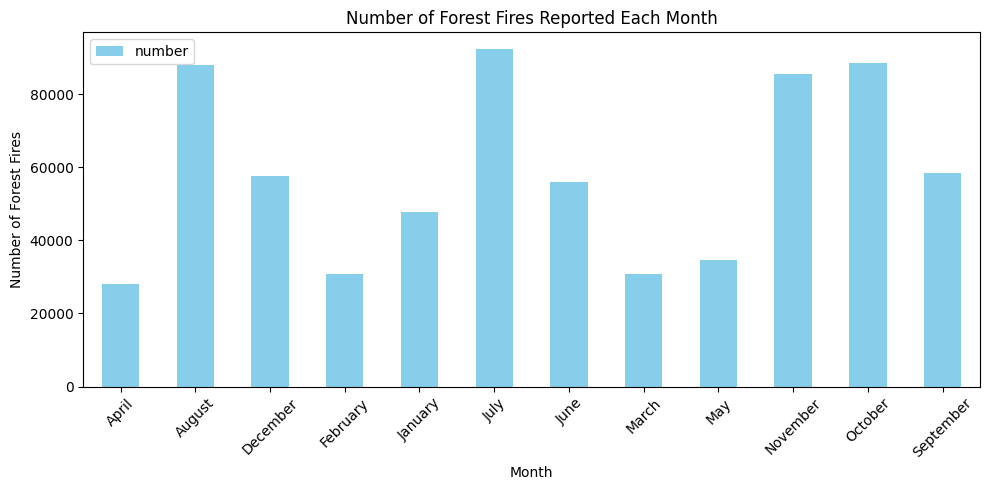

Month with maximum forest fires: July


In [130]:
#max fires in a month
monthly_fires = df.groupby('month')['number'].sum()

# Find the month with the maximum number of forest fires reported
max_month = monthly_fires.idxmax()

# Plotting
plt.figure(figsize=(10, 5))
monthly_fires.plot(kind='bar', color='skyblue')
plt.title('Number of Forest Fires Reported Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Forest Fires')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Output the month with the maximum number of forest fires reported
print("Month with maximum forest fires:", max_month)

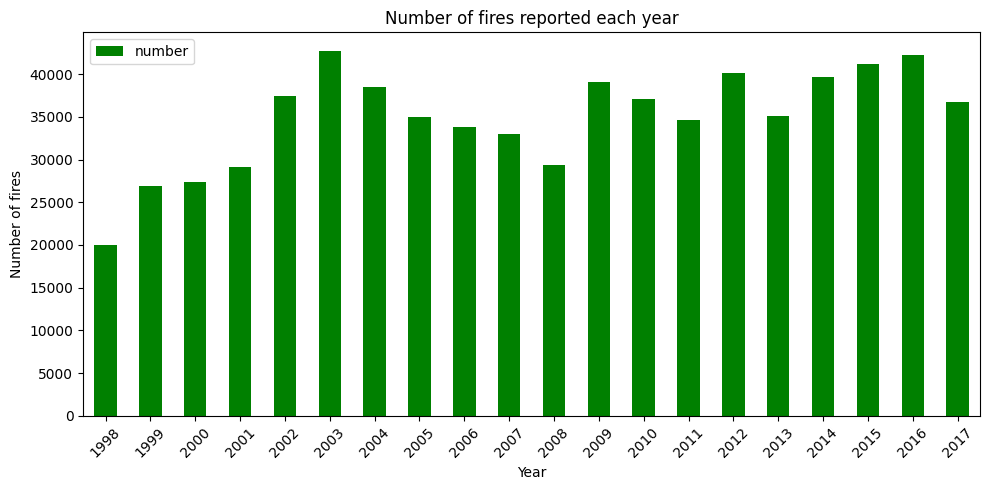

Year with highest fires: 2003


In [131]:
#Year with max fires
max_year = df.groupby('year')['number'].sum()

plt.figure(figsize=(10, 5))
max_year.plot(kind='bar', color = 'green')
plt.title('Number of fires reported each year')
plt.xlabel('Year')
plt.ylabel('Number of fires')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

print(f"Year with highest fires: {max_year.idxmax()}")

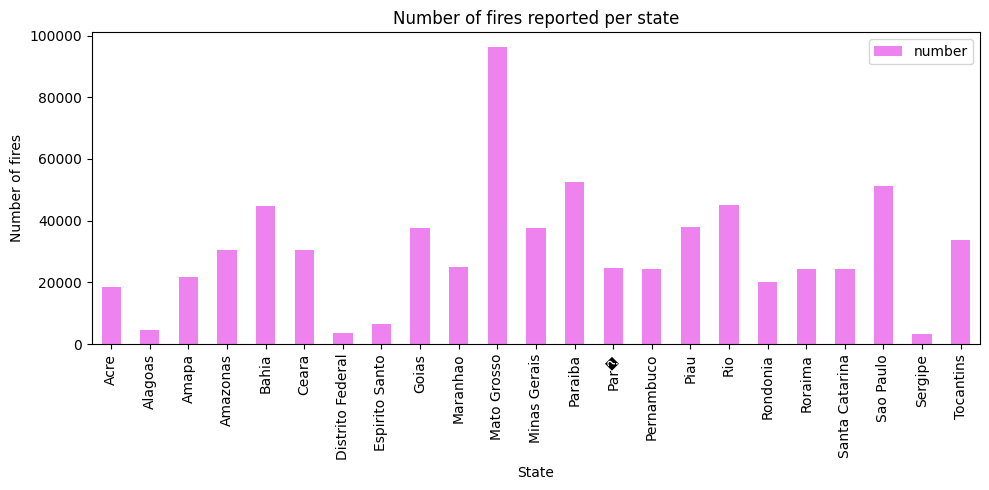

State with highest fires: Mato Grosso


In [132]:
#State with max number of fires
max_state = df.groupby('state')['number'].sum()

plt.figure(figsize=(10, 5))
max_state.plot(kind='bar', color = 'violet')
plt.title('Number of fires reported per state')
plt.xlabel('State')
plt.ylabel('Number of fires')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

print(f"State with highest fires: {max_state.idxmax()}")

In [133]:
#Find total number of fires were reported in amazonas
print(df.loc[df['state'] == 'Amazonas', 'number'].sum())

30650.129


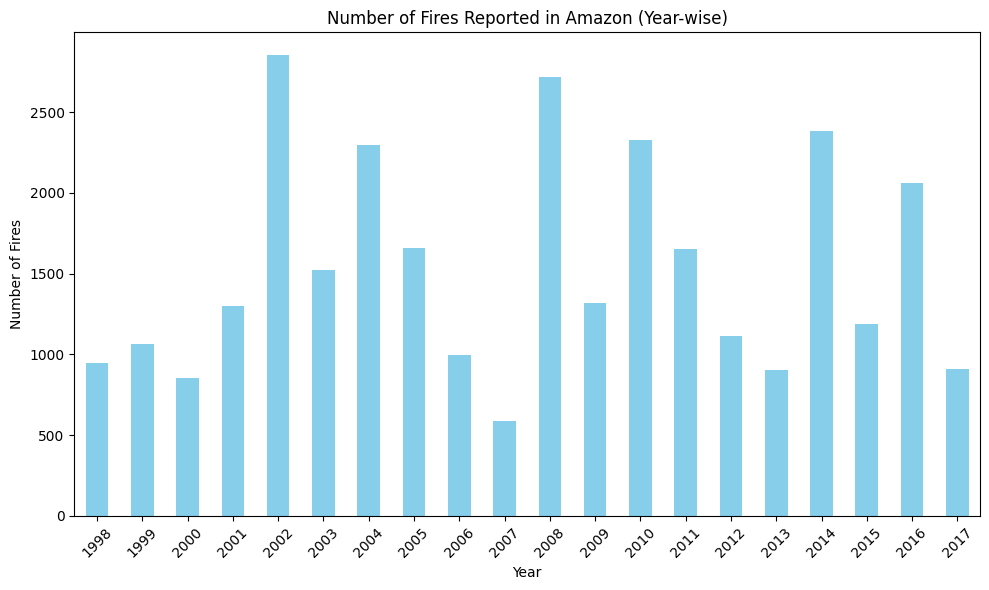

In [134]:
amazon_fires = df[df['state'] == 'Amazonas']
yearly_fires = amazon_fires.groupby('year')['number'].sum()

# Plotting
plt.figure(figsize=(10, 6))
yearly_fires.plot(kind='bar', color='skyblue')
plt.title('Number of Fires Reported in Amazon (Year-wise)')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

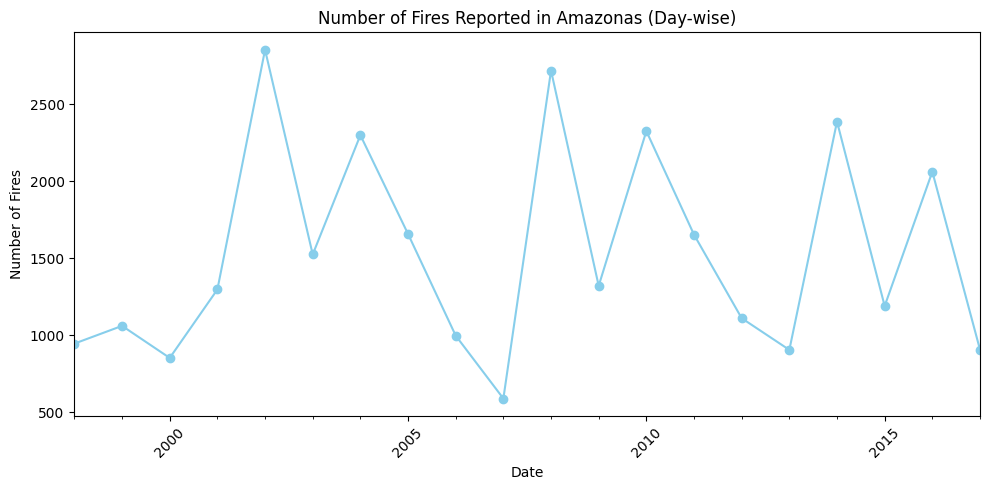

In [136]:
df['date'] = pd.to_datetime(df['date'])
amazon_fires = df[df['state'] == 'Amazonas']
daily_fires = amazon_fires.groupby('date')['number'].sum()

# Plotting
plt.figure(figsize=(10, 5))
daily_fires.plot(kind='line', marker='o', color='skyblue')
plt.title('Number of Fires Reported in Amazonas (Day-wise)')
plt.xlabel('Date')
plt.ylabel('Number of Fires')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

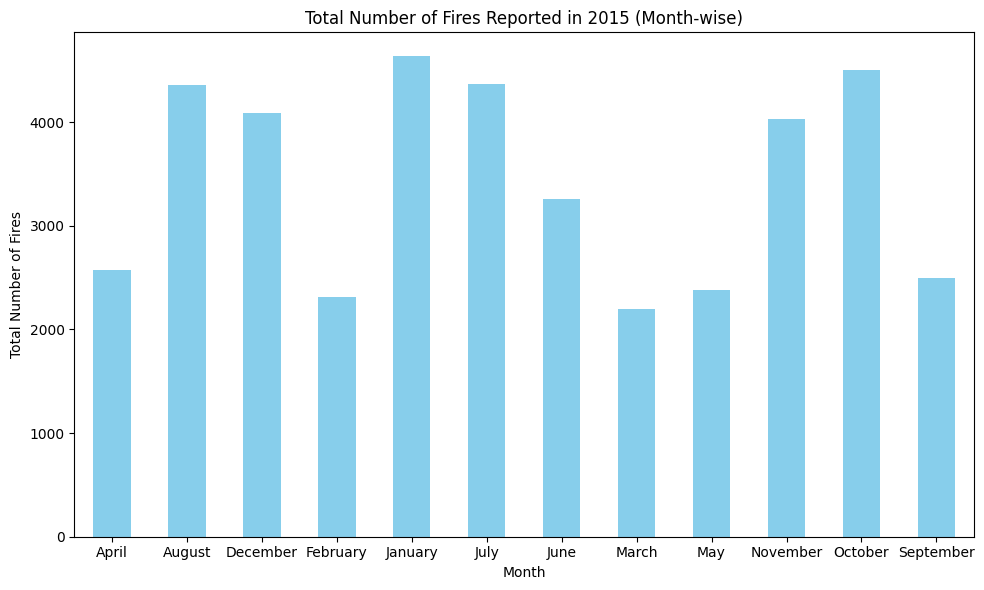

In [140]:
#Monthly fires in 2015
fires_2015 = df[df['year'] == 2015]
monthly_fires_2015 = fires_2015.groupby('month')['number'].sum()

plt.figure(figsize=(10, 6))
monthly_fires_2015.plot(kind='bar', color='skyblue')
plt.title('Total Number of Fires Reported in 2015 (Month-wise)')
plt.xlabel('Month')
plt.ylabel('Total Number of Fires')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

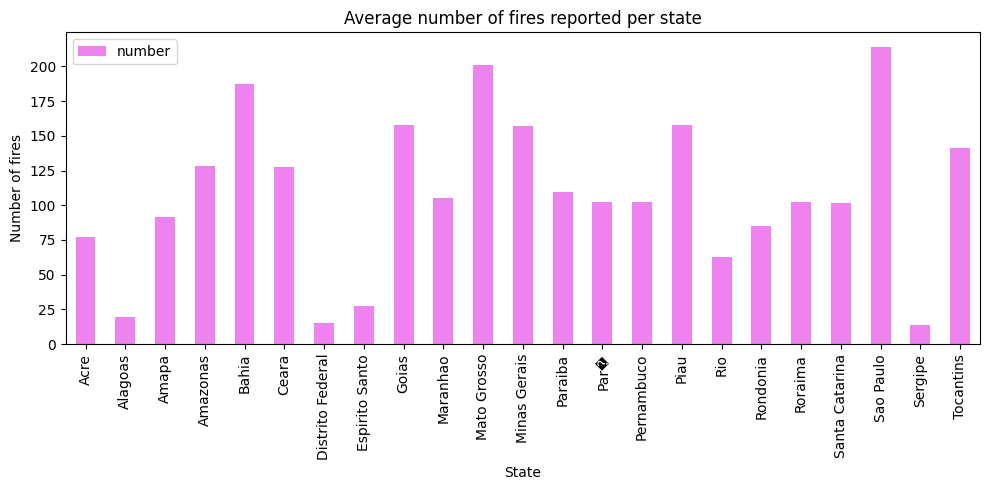

State with highest fires: Sao Paulo


In [141]:
#State with average number of fires
avg_state = df.groupby('state')['number'].mean()

plt.figure(figsize=(10, 5))
avg_state.plot(kind='bar', color = 'violet')
plt.title('Average number of fires reported per state')
plt.xlabel('State')
plt.ylabel('Number of fires')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

print(f"State with highest fires: {avg_state.idxmax()}")

In [146]:
df_dec = df[df['month'] == 'December']
states_dec = df_dec['state'].unique()
print(states_dec)

['Acre' 'Alagoas' 'Amapa' 'Amazonas' 'Bahia' 'Ceara' 'Distrito Federal'
 'Espirito Santo' 'Goias' 'Maranhao' 'Mato Grosso' 'Minas Gerais' 'Par�'
 'Paraiba' 'Pernambuco' 'Piau' 'Rio' 'Rondonia' 'Roraima' 'Santa Catarina'
 'Sao Paulo' 'Sergipe' 'Tocantins']
